In [1]:
import os

curr_dir = os.path.split(os.getcwd())[1]
if curr_dir != "irl-environment-design":
    os.chdir("..")

In [2]:
import numpy as np

from src.utils.make_environment import (
    transition_matrix,
    Environment,
    insert_walls_into_T,
)

from src.utils.constants import ParamTuple

np.set_printoptions(linewidth=160, precision=2)

from src.utils.environment_design import EnvironmentDesign

from src.utils.inference.posterior import PosteriorInference

### Create Environment

In [3]:
# 0. Setup
## 0.2 Setup the environment
N, M = 7,7

# TODO describe world
agent_R = np.zeros((N, M))
agent_R[N-1, 0] = 1
agent_R[N-1, M-1] = 3



# Start by making the agent we want to learn the policy of
agent_p = 0.7
agent_gamma = 0.6
p_true=0.7

agent_R = agent_R.flatten()
goal_states = np.where(agent_R != 0)[0]

true_params = ParamTuple(agent_p, agent_gamma, agent_R)

wall_states = [14]

T_true = transition_matrix(N, M, p=p_true, absorbing_states=goal_states)
T_True = insert_walls_into_T(T=T_true, wall_indices=wall_states)

big_small = Environment(
    N=N,
    M=M,
    T_true=T_true,
    wall_states=wall_states,
    R_true=agent_R,
    start_state=0,
    n_walls=None,
    goal_states=goal_states
)

### Environment Design

In [4]:
env_design = EnvironmentDesign(base_environment=big_small, user_params=true_params, learn_what = "gamma, T")

In [5]:
candidate_environments_args = {}
# candidate_environments_args["n_environments"] = 50
candidate_environments_args["generate_how"] = "entropy_BM"
# candidate_environments_args["n_walls"] = 5


env_design.run_n_episodes(n_episodes=15,
                          candidate_environments_args=candidate_environments_args)

# env_design.save("big_small")

Started episode 0.
Finished episode 0.
Started episode 1.


12it [00:00, 16.19it/s]


Mean Parameters: ParamTuple(p=0.6826489113748133, gamma=0.6571319752310579, R=None)
Computed Region of Interest. Size = 0.52


/home/paul/Desktop/Uni/classes/CS282R/irl-environment-design/src/utils/make_candidate_environments.py:137: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R = torch.tensor(R_init, dtype=torch.float32)


Finished BM Search. Entropy: 1.0549201679861442.
Finished episode 1.
Started episode 2.


12it [00:00, 17.51it/s]


Mean Parameters: ParamTuple(p=0.661007350534303, gamma=0.6378284549378413, R=None)
Computed Region of Interest. Size = 0.4
Finished BM Search. Entropy: 1.0430161194061216.
Finished episode 2.
Started episode 3.


12it [00:00, 15.36it/s]


Mean Parameters: ParamTuple(p=0.6677243505435654, gamma=0.6362800557519773, R=None)
Computed Region of Interest. Size = 0.3
Finished BM Search. Entropy: 1.0487240858861342.
Finished episode 3.
Started episode 4.


12it [00:00, 14.34it/s]


Mean Parameters: ParamTuple(p=0.690442529481329, gamma=0.6253940922176257, R=None)
Computed Region of Interest. Size = 0.24
Finished BM Search. Entropy: 1.066562484888105.
Finished episode 4.
Started episode 5.


12it [00:00, 14.06it/s]


Mean Parameters: ParamTuple(p=0.6874691162741069, gamma=0.6219261541705107, R=None)
Computed Region of Interest. Size = 0.19
Finished BM Search. Entropy: 1.0820131534045052.
Finished episode 5.
Started episode 6.


12it [00:00, 17.02it/s]


Mean Parameters: ParamTuple(p=0.6886060239170517, gamma=0.6113106517397615, R=None)
Computed Region of Interest. Size = 0.15
Finished BM Search. Entropy: 1.052922565938695.
Finished episode 6.
Started episode 7.


12it [00:00, 19.42it/s]


Mean Parameters: ParamTuple(p=0.7085909139094513, gamma=0.5907441638404053, R=None)
Computed Region of Interest. Size = 0.11
Finished BM Search. Entropy: 1.0717300941124526.
Finished episode 7.
Started episode 8.


12it [00:00, 22.35it/s]


Mean Parameters: ParamTuple(p=0.7237085477749248, gamma=0.5902127348886097, R=None)
Computed Region of Interest. Size = 0.09
Finished BM Search. Entropy: 1.0928305535284886.
Finished episode 8.
Started episode 9.


12it [00:00, 23.71it/s]


Mean Parameters: ParamTuple(p=0.7327428039883069, gamma=0.5930165572881746, R=None)
Computed Region of Interest. Size = 0.08
Finished BM Search. Entropy: 1.0361987848192837.
Finished episode 9.
Started episode 10.


12it [00:00, 24.75it/s]


Mean Parameters: ParamTuple(p=0.7318472261668705, gamma=0.6034468865072738, R=None)
Computed Region of Interest. Size = 0.06
Finished BM Search. Entropy: 0.9950269901795212.
Finished episode 10.
Started episode 11.


12it [00:00, 26.87it/s]


Mean Parameters: ParamTuple(p=0.7444703499537497, gamma=0.5964006015529641, R=None)
Computed Region of Interest. Size = 0.06
Finished BM Search. Entropy: 1.0397207708399179.
Finished episode 11.
Started episode 12.


12it [00:00, 28.43it/s]


Mean Parameters: ParamTuple(p=0.7393404919807892, gamma=0.5937416198882777, R=None)
Computed Region of Interest. Size = 0.05
Finished BM Search. Entropy: 1.0042424730540764.
Finished episode 12.
Started episode 13.


12it [00:00, 29.37it/s]


Mean Parameters: ParamTuple(p=0.7337478421124269, gamma=0.6012485433613749, R=None)
Computed Region of Interest. Size = 0.04
Finished BM Search. Entropy: 1.0114042647073518.
Finished episode 13.
Started episode 14.


12it [00:00, 31.01it/s]


Mean Parameters: ParamTuple(p=0.7324713837775038, gamma=0.6101184763467707, R=None)
Computed Region of Interest. Size = 0.03
Finished BM Search. Entropy: 1.0549201679861442.
Finished episode 14.


### Inference - load observations and initialize posterior inference class.

In [6]:
import pickle

experiment_1_path = os.path.join("checkpoints", "big_small", "26.04.2024", "09:09:21")
experiment_2_path = os.path.join("checkpoints", "big_small", "26.04.2024", "10:51:27")
experiment_3_path = os.path.join("checkpoints", "big_small", "26.04.2024", "11:09:02")


def load_file(file_name):
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
    return data

# Example usage
big_small_experiment_1 = load_file(experiment_1_path)
big_small_experiment_2 = load_file(experiment_2_path)
big_small_experiment_3 = load_file(experiment_3_path)


In [7]:
diags_1 = big_small_experiment_1["diagnostics"]
diags_2 = big_small_experiment_2["diagnostics"]
diags_3 = big_small_experiment_3["diagnostics"]

## Plot Diagnostics

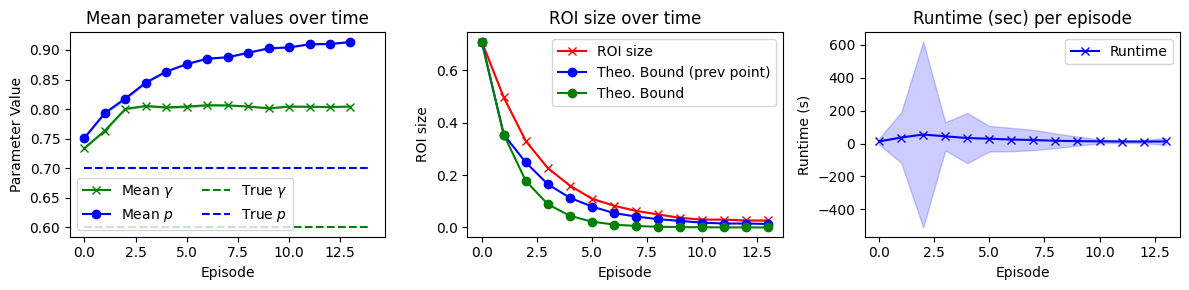

In [8]:
def make_diagnostics_data(diags):


    params = diags["parameter_means"]
    roi_sizes = diags["ROI_sizes"]
    runtimes = diags["runtime_secs"]
    theoretical_halfing_prev = [roi_size/2 for roi_size in roi_sizes[:-1]]
    theoretical_halfing_prev = [roi_sizes[0]] + theoretical_halfing_prev
    theoretical_halfing = [roi_sizes[0]/(2**i) for i in range(len(roi_sizes))]
    gammas = []
    ps = []

    for param in params:
        gammas.append(param.gamma)
        ps.append(param.p)

    return np.array(gammas), np.array(ps), np.array(roi_sizes), np.array(runtimes), np.array(theoretical_halfing_prev), np.array(theoretical_halfing)

gammas_1, ps_1, roi_sizes_1, runtimes_1, theoretical_halfing_prev_1, theoretical_halfing_1 = make_diagnostics_data(diags_1)
gammas_2, ps_2, roi_sizes_2, runtimes_2, theoretical_halfing_prev_2, theoretical_halfing_2 = make_diagnostics_data(diags_2)
gammas_3, ps_3, roi_sizes_3, runtimes_3, theoretical_halfing_prev_3, theoretical_halfing_3 = make_diagnostics_data(diags_3)

mean_gammas = np.mean([gammas_1, gammas_2, gammas_3], axis=0)
mean_ps = np.mean([ps_1, ps_2, ps_3], axis=0)
mean_roi_sizes = np.mean([roi_sizes_1, roi_sizes_2, roi_sizes_3], axis=0)
mean_runtimes = np.mean([runtimes_1, runtimes_2, runtimes_3], axis=0)
mean_theoretical_halfing_prev = np.mean([theoretical_halfing_prev_1, theoretical_halfing_prev_2, theoretical_halfing_prev_3], axis=0)
mean_theoretical_halfing = np.mean([theoretical_halfing_1, theoretical_halfing_2, theoretical_halfing_3], axis=0)

var_gammas = np.var([gammas_1, gammas_2, gammas_3], axis=0)
var_ps = np.var([ps_1, ps_2, ps_3], axis=0)
var_roi_sizes = np.var([roi_sizes_1, roi_sizes_2, roi_sizes_3], axis=0)
var_runtimes = np.var([runtimes_1, runtimes_2, runtimes_3], axis=0)
var_theoretical_halfing_prev = np.var([theoretical_halfing_prev_1, theoretical_halfing_prev_2, theoretical_halfing_prev_3], axis=0)
var_theoretical_halfing = np.var([theoretical_halfing_1, theoretical_halfing_2, theoretical_halfing_3], axis=0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].plot(mean_gammas, "g-x", label = "Mean $\gamma$")
ax[0].plot(mean_ps, "b-o", label="Mean $p$")
ax[0].fill_between(np.arange(0, len(gammas_1)), mean_gammas - 2*var_gammas, mean_gammas + 2*var_gammas, color="g", alpha=0.2)
ax[0].fill_between(np.arange(0, len(gammas_1)), mean_ps - 2*var_ps, mean_ps + 2*var_ps, color="b", alpha=0.2)
ax[0].set_xlabel("Episode")
ax[0].set_ylabel("Parameter Value")
ax[0].set_title("Mean parameter values over time")
ax[0].hlines(agent_gamma, 0, len(gammas_1), colors="g", linestyles="--", label="True $\gamma$")
ax[0].hlines(agent_p, 0, len(gammas_1), colors="b", linestyles="--", label="True $p$")
# ax[0].set_ylim(0.5, 0.95)
ax[0].legend(ncol=2)

ax[1].plot(mean_roi_sizes, "r-x", label="ROI size")
ax[1].plot(mean_theoretical_halfing_prev, "b-o", label="Theo. Bound (prev point)")
ax[1].plot(mean_theoretical_halfing, "g-o", label="Theo. Bound")
ax[1].fill_between(np.arange(0, len(mean_roi_sizes)), mean_roi_sizes - 2*var_roi_sizes, mean_roi_sizes + 2*var_roi_sizes, color="r", alpha=0.2)
ax[1].set_xlabel("Episode")
ax[1].set_ylabel("ROI size")
ax[1].set_title("ROI size over time")
ax[1].legend()

ax[2].plot(mean_runtimes, "b-x", label="Runtime")
ax[2].fill_between(np.arange(0, len(mean_roi_sizes)), mean_runtimes - 2*var_runtimes, mean_runtimes + 2*var_runtimes, color="b", alpha=0.2)
ax[2].set_xlabel("Episode")
ax[2].set_ylabel("Runtime (s)")
ax[2].set_title("Runtime (sec) per episode")
ax[2].legend()
plt.tight_layout()
plt.show()

In [9]:
obs = big_small_experiment["all_observations"][7]

NameError: name 'big_small_experiment' is not defined

In [ ]:
obs[0].R_true

tensor([ 0.0000,  0.0857,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0806,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0845,  0.0912,  0.1076,
         0.1297,  0.0000,  1.0000, -0.0954,  0.0000,  0.0000,  0.0000,  0.1526,
         3.0000])

In [ ]:
pos_inference = PosteriorInference(expert_trajectories=[big_small_experiment["all_observations"][7]],
                                    resolution = 15,
                                    min_gamma = 0.5,
                                    max_gamma = 0.99,
                                    min_p = 0.5,
                                    max_p = 0.99)

### Calculate Posterior Distribution.

In [ ]:
pos_inference.calculate_posterior(num_episodes=1)

Calculate distribution of episode 0, e.g. the prior distribution.
Calculate distribution of episode 1.


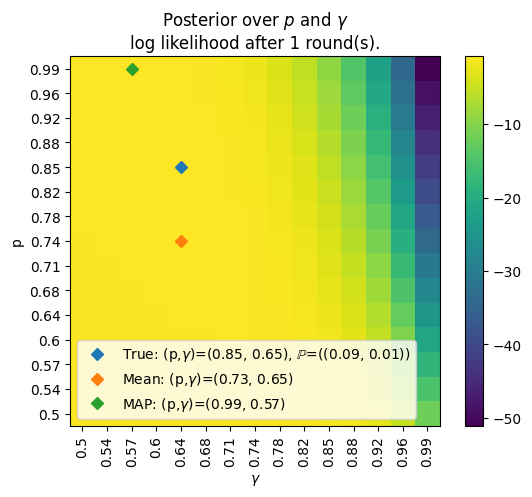

In [ ]:
pos_inference.plot_posterior(episode=1, param_values=true_params)

### Make inference.

In [ ]:
pos_inference.plot_statistics_over_time(episode=4, true_params=true_params)

AssertionError: Posterior Distribution for this episode does not exist yet. Only the following episodes exist: dict_keys(['episode=0', 'episode=1'])

In [ ]:
pos_inference.plot_posterior(episode=10, true_params=true_params)